In [37]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, classification_report,
                            RocCurveDisplay, PrecisionRecallDisplay)
import graphviz

# Загрузка данных
data = pd.read_csv('diabetes.csv')

In [38]:
# Разделение на признаки и целевую переменную
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (614, 8)
Размер тестовой выборки: (154, 8)


In [39]:
# Создание и обучение модели
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Предсказания и метрики
log_reg_pred = log_reg.predict(X_test)
log_reg_proba = log_reg.predict_proba(X_test)[:, 1]

print("Логистическая регрессия:")
print(classification_report(y_test, log_reg_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, log_reg_proba):.3f}")

Логистическая регрессия:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC-AUC: 0.813


In [40]:
# Создание и обучение модели
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Предсказания и метрики
dtree_pred = dtree.predict(X_test)
dtree_proba = dtree.predict_proba(X_test)[:, 1]

print("Решающее дерево (стандартные параметры):")
print(classification_report(y_test, dtree_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, dtree_proba):.3f}")

Решающее дерево (стандартные параметры):
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

ROC-AUC: 0.742


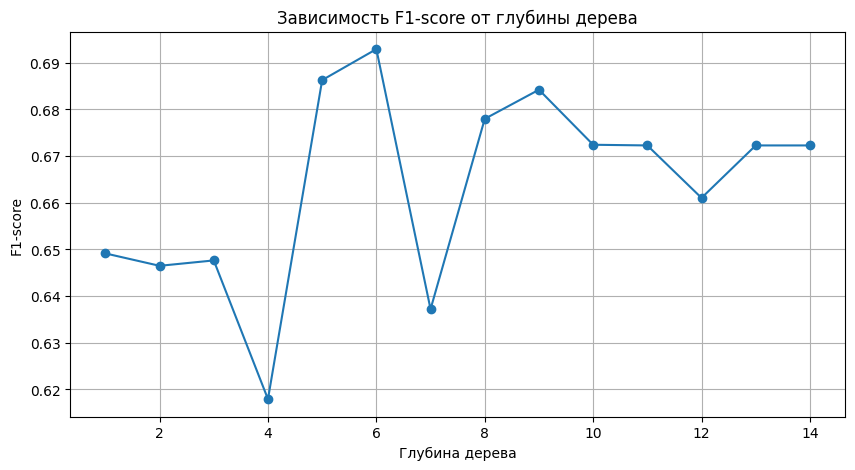

Оптимальная глубина: 6 (F1-score = 0.693)


In [41]:
depths = range(1, 15)
f1_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, pred))

# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(depths, f1_scores, marker='o')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от глубины дерева')
plt.grid()
plt.show()

# Определение оптимальной глубины
optimal_depth = depths[np.argmax(f1_scores)]
print(f"Оптимальная глубина: {optimal_depth} (F1-score = {max(f1_scores):.3f})")

In [42]:
# Обучение модели с оптимальной глубиной
best_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
best_tree.fit(X_train, y_train)

# Визуализация дерева
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("diabetes_tree", format="png")  

'diabetes_tree.png'

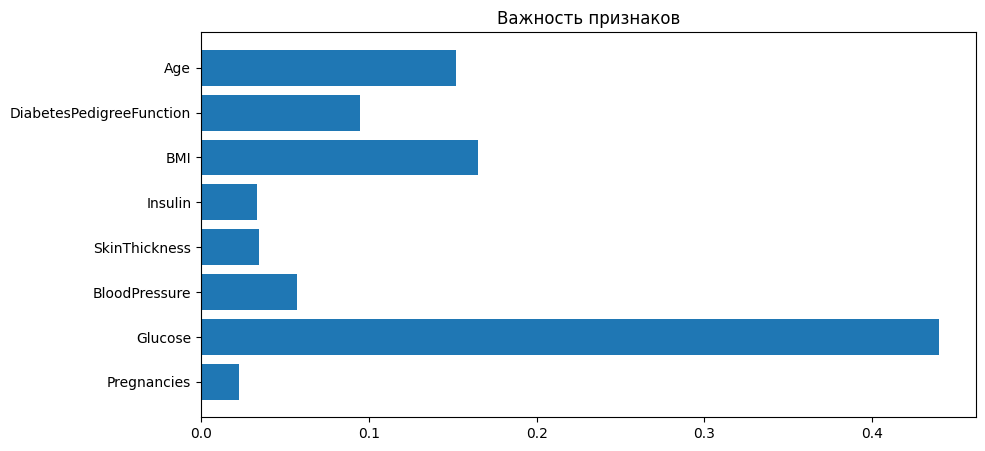

Наиболее важный признак: Glucose (0.440)


In [43]:
# Построение графика важности признаков
plt.figure(figsize=(10, 5))
importances = best_tree.feature_importances_
plt.barh(X.columns, importances)
plt.title('Важность признаков')
plt.show()

# Вывод наиболее важных признаков
most_important = X.columns[np.argmax(importances)]
print(f"Наиболее важный признак: {most_important} ({max(importances):.3f})")

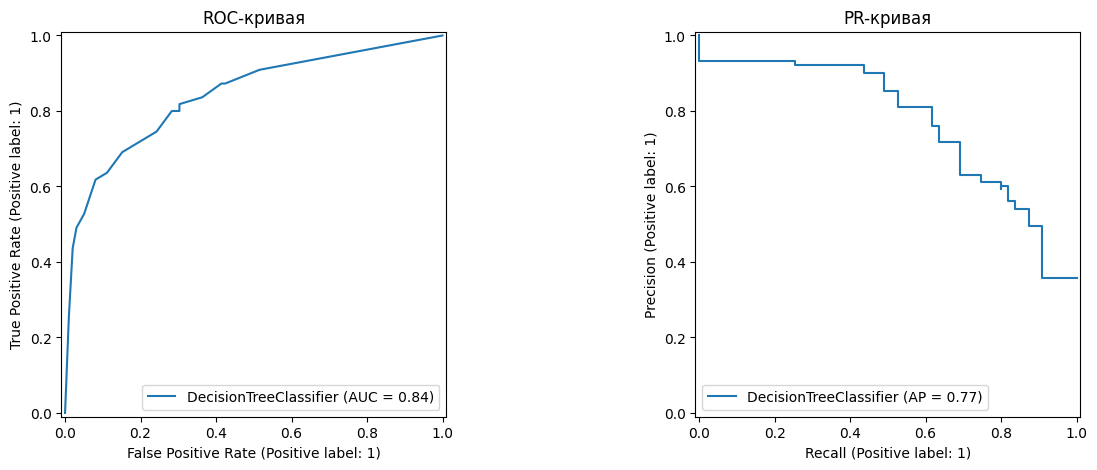

In [44]:
# Построение кривых
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
RocCurveDisplay.from_estimator(best_tree, X_test, y_test, ax=ax1)
ax1.set_title('ROC-кривая')
PrecisionRecallDisplay.from_estimator(best_tree, X_test, y_test, ax=ax2)
ax2.set_title('PR-кривая')
plt.show()

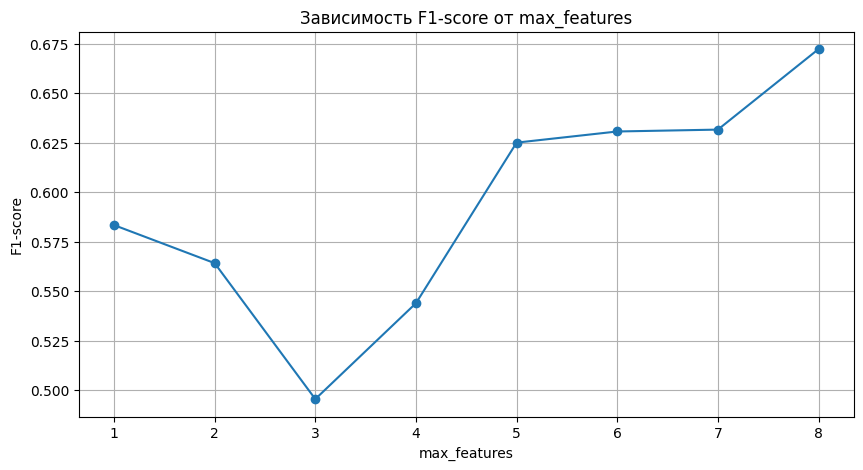

Оптимальное количество признаков: 8 (F1-score = 0.672)


In [45]:
# Исследование зависимости от max_features
features = range(1, X.shape[1] + 1)
f1_scores_features = []

for n in features:
    model = DecisionTreeClassifier(max_features=n, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores_features.append(f1_score(y_test, pred))

# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(features, f1_scores_features, marker='o')
plt.xlabel('max_features')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от max_features')
plt.grid()
plt.show()

optimal_features = features[np.argmax(f1_scores_features)]
print(f"Оптимальное количество признаков: {optimal_features} (F1-score = {max(f1_scores_features):.3f})")